In [43]:
import pandas as pd
import numpy as np
import platform #os 정보를 가져 올 수 있는 모듈
import seaborn as sns

from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System… sorry~~~~')

In [2]:
edu = pd.read_csv("./data/xAPI-Edu-Data.csv")
edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
edu_copy = edu.copy()

In [5]:
class_L_mask = edu_copy["Class"] == 'L'
edu_L = edu[class_L_mask]
edu_L

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
12,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,5,1,0,11,No,Bad,Above-7,L
13,M,lebanon,lebanon,MiddleSchool,G-08,A,Math,F,Father,20,14,12,19,No,Bad,Above-7,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,9,6,15,85,No,Bad,Above-7,L
474,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Father,2,7,4,8,No,Bad,Above-7,L
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [6]:
class_M_mask = edu_copy["Class"] == 'M'
edu_M = edu[class_M_mask]
edu_M

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,M,Palestine,Jordan,MiddleSchool,G-08,A,History,S,Father,78,82,78,53,Yes,Good,Under-7,M
472,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,F,Father,80,87,74,68,Yes,Good,Under-7,M
473,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,S,Father,85,88,79,70,Yes,Good,Under-7,M
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M


In [7]:
class_H_mask = edu_copy["Class"] == 'H'
edu_H = edu[class_H_mask]
edu_H

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
10,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,88,30,80,Yes,Good,Under-7,H
14,F,KW,KuwaIT,MiddleSchool,G-08,A,Math,F,Mum,62,70,44,60,No,Bad,Above-7,H
19,M,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Mum,70,50,40,99,Yes,Good,Under-7,H
30,F,KW,KuwaIT,MiddleSchool,G-08,A,Arabic,F,Father,35,80,50,70,Yes,Good,Under-7,H
47,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Mum,70,4,39,90,Yes,Good,Under-7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,M,Iraq,Iraq,MiddleSchool,G-08,A,Chemistry,S,Father,80,90,80,83,Yes,Good,Under-7,H
464,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,85,99,42,90,Yes,Good,Under-7,H
465,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,89,96,45,92,Yes,Good,Under-7,H
466,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Mum,80,82,64,58,Yes,Good,Under-7,H


In [8]:
edu_L_ab = edu_L.groupby('StudentAbsenceDays').count()
edu_L_ab

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,Class
StudentAbsenceDays,,,,,,,,,,,,,,,,
Above-7,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
Under-7,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [9]:
edu_M_ab = edu_M.groupby('StudentAbsenceDays').count()
edu_M_ab

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,Class
StudentAbsenceDays,,,,,,,,,,,,,,,,
Above-7,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71
Under-7,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140


In [10]:
edu_H_ab = edu_H.groupby('StudentAbsenceDays').count()
edu_H_ab

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,Class
StudentAbsenceDays,,,,,,,,,,,,,,,,
Above-7,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Under-7,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138


In [11]:
column_names = ["StudentAbsenceDays"]
edu_by_class = edu.groupby("Class")[column_names].count()
edu_by_class

,StudentAbsenceDays
Class,
H,142
L,127
M,211


In [12]:
edu_copy = edu.copy()

edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [18]:
edu_copy["StudentAbsenceDays2"] = "Yes"

In [19]:
edu_copy.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,StudentAbsenceDays2
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,Yes
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,Yes
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,Yes
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,Yes
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,Yes


In [ ]:
absence_mask =  edu_copy["StudentAbsenceDays"]

In [40]:
edu_L_ab = edu_L.groupby('StudentAbsenceDays')[['Class']].count()
edu_L_ab

edu_L_ab = edu_L_ab.rename(columns={"Class" : "L"})
edu_L_ab

,L
StudentAbsenceDays,
Above-7,116
Under-7,11


In [39]:
edu_M_ab = edu_M.groupby('StudentAbsenceDays')[['Class']].count()
edu_M_ab

edu_M_ab = edu_M_ab.rename(columns={"Class" : "M"})
edu_M_ab

,M
StudentAbsenceDays,
Above-7,71
Under-7,140


In [38]:
edu_H_ab = edu_H.groupby('StudentAbsenceDays')[['Class']].count()
edu_H_ab

edu_H_ab = edu_H_ab.rename(columns={"Class" : "H"})
edu_H_ab

,H
StudentAbsenceDays,
Above-7,4
Under-7,138


In [41]:
edu_concat = pd.concat([edu_L_ab, edu_M_ab, edu_H_ab], axis = 1)
edu_concat


,L,M,H
StudentAbsenceDays,,,
Above-7,116,71,4
Under-7,11,140,138


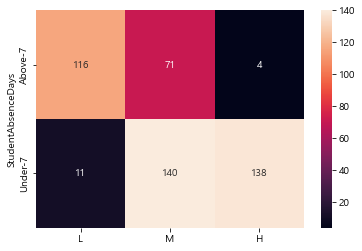

In [46]:
x = edu_concat
sns.heatmap(x, annot=True, fmt='d')
plt.show()

In [81]:
gender_mask1 = edu_IT['gender'] == 'M'

edu_IT_M = edu_IT[gender_mask1]
edu_IT_M.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [82]:
gender_mask2 = edu_IT['gender'] == 'F'

edu_IT_F = edu_IT[gender_mask2]
edu_IT_F.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M
15,F,KW,KuwaIT,MiddleSchool,G-06,A,IT,F,Father,30,40,22,66,Yes,Good,Under-7,M
18,F,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Mum,69,15,36,96,Yes,Good,Under-7,M
20,F,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,60,60,33,90,No,Bad,Above-7,M


In [83]:
column_names = ["Topic"]
edu_IT_M_by_class = edu_IT_M.groupby("Class")[column_names].count()
edu_IT_M_by_class

,Topic
Class,
H,8
L,31
M,24


In [84]:
column_names = ["Topic"]
edu_IT_F_by_class = edu_IT_F.groupby("Class")[column_names].count()
edu_IT_F_by_class

,Topic
Class,
H,7
L,7
M,18


In [77]:
IT_F_mask = edu_IT["gender"] == 'F'
edu_F_IT = edu_IT[IT_F_mask]
edu_F_IT.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M
15,F,KW,KuwaIT,MiddleSchool,G-06,A,IT,F,Father,30,40,22,66,Yes,Good,Under-7,M
18,F,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Mum,69,15,36,96,Yes,Good,Under-7,M
20,F,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,60,60,33,90,No,Bad,Above-7,M


In [78]:
gender_mask2 = edu_IT['gender'] == 'F'

edu_IT_F = edu_IT[gender_mask2]
edu_IT_F.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M
15,F,KW,KuwaIT,MiddleSchool,G-06,A,IT,F,Father,30,40,22,66,Yes,Good,Under-7,M
18,F,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Mum,69,15,36,96,Yes,Good,Under-7,M
20,F,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,60,60,33,90,No,Bad,Above-7,M


In [86]:
column_names = ["Topic"]
edu_IT_F_by_class = edu_IT_F.groupby("Class")[column_names].count()
edu_IT_F_by_class

,Topic
Class,
H,7
L,7
M,18


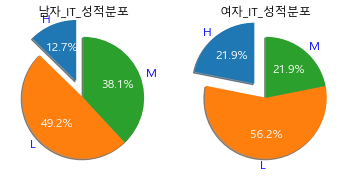

In [89]:
plt.subplot(1, 2, 1)
labels = edu_IT_M_by_class.index
sizes  = edu_IT_M_by_class["Topic"] # 파이에서 차지할 비율 - percentage
explode = (0.3, 0, 0)

patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90
)

# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(12)
  t.set_color('blue')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(12)
  t.set_color('white')

plt.title("남자_IT_성적분포")

plt.subplot(1, 2, 2)

labels = edu_IT_F_by_class.index
sizes  = edu_IT_F_by_class["Topic"]
sizes  = [7, 18, 7] # 파이에서 차지할 비율 - percentage
explode = (0.3, 0, 0)

patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90
)

# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(12)
  t.set_color('blue')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(12)
  t.set_color('white')

plt.title("여자_IT_성적분포")

plt.show()